In [1]:
%matplotlib inline
import pysal as ps
import pandas as pd
import numpy as np

from shapely.geometry import Polygon, point
from geopandas import GeoSeries, GeoDataFrame, read_file
from pandas import DataFrame
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
kdeDamageAndArson1 = read_file('CrimeStatOutput/1_2017DamageAndArson1CrimeCountKDE.shp')
kdeBurglary1 = read_file('CrimeStatOutput/1_2017Burglary1CrimeCountKDE.shp')
kdePublicOrder1 = read_file('CrimeStatOutput/1_2017PublicOrder1CrimeCountKDE.shp')
kdeVehicleCrime1 = read_file('CrimeStatOutput/1_2017VehicleCrime1CrimeCountKDE.shp')

In [4]:
#kdeAntisocial117 = read_file('CrimeStatOutput/1_2017Antisocia1CrimeCountKDE.shp')
#kdeViolenceAndSex117 = read_file('CrimeStatOutput/1_2017ViolenceAndSex1CrimeCountKDE.shp')
areas = read_file('data/Clipped.shp')

In [5]:
def findKdeInArea(kde, area):
    values = []
    found = 0
    for i, a in area.iterrows():
        value_z = []
        for j, k in kde.iterrows():
            if a['geometry'].intersects(k['geometry']):
                value_z.append(k['Z'])
                found = 1
                kde = kde.drop([j])
        if found ==1:
            values.append([value_z, a['code'], a['geometry']])
            found = 0
    return values

def extractMaxIs(values_i):
    max_z= []
    codes = []
    geo = []
    temp=0
    for i in range(0,len(values_i)):
        max_z.append(max(values_i[i][0]))
        codes.append(values_i[i][1])
        geo.append(values_i[i][2])    
    kde_maxs = GeoDataFrame()
    kde_maxs['LSOA11CD'] = GeoSeries(codes)
    kde_maxs['geometry'] = GeoSeries(geo)
    kde_maxs['Z'] = GeoSeries(max_z)   
    return kde_maxs

def getTopQuantile(polygons):
    zs = []
    geo = []
    for i in range(0, len(polygons)/5):
        zs.append(max(polygons['Z']))
        index = polygons.loc[polygons['Z']==max(polygons['Z'])].index
        geo.append(polygons['geometry'][index[0]])   
        polygons = polygons.drop([index[0]])
    qTop5kde = GeoDataFrame()
    qTop5kde['geometry'] = GeoSeries(geo)
    qTop5kde['Z'] = GeoSeries(zs)
    return qTop5kde

In [6]:
kdeDA_in_area = findKdeInArea(getTopQuantile(kdeDamageAndArson1), areas)
DA117_ZMax = extractMaxIs(kdeDA_in_area)
DA117_ZMax.to_file('DA117_LsoaZMax.shp', driver='ESRI Shapefile')
print "kdeAS_in_area finished"

kdeBur_in_area = findKdeInArea(getTopQuantile(kdeBurglary1), areas)
Bur117_ZMax = extractMaxIs(kdeBur_in_area)
Bur117_ZMax.to_file('Bur117_LsoaZMax.shp', driver='ESRI Shapefile')
print "kdeAS_in_area finished"

kdePub_in_area = findKdeInArea(getTopQuantile(kdePublicOrder1), areas)
Pub117_ZMax = extractMaxIs(kdePub_in_area)
Pub117_ZMax.to_file('Pub117_LsoaZMax.shp', driver='ESRI Shapefile')
print "kdeAS_in_area finished"

kdeVeh_in_area = findKdeInArea(getTopQuantile(kdeVehicleCrime1), areas)
Veh117_ZMax = extractMaxIs(kdeVeh_in_area)
Veh117_ZMax.to_file('Veh117_LsoaZMax.shp', driver='ESRI Shapefile')
print "kdeAS_in_area finished"

kdeAS_in_area finished
kdeAS_in_area finished
kdeAS_in_area finished
kdeAS_in_area finished


In [92]:
kdeAS_in_area = findKdeInArea(getTopQuantile(kdeAntisocial117), areas)
AS117_ZMax = extractMaxIs(kdeAS_in_area)
AS117_ZMax.to_file('AS117_LsoaZMax.shp', driver='ESRI Shapefile')
print "kdeAS_in_area finished"

kdeVS_in_area = findKdeInArea(getTopQuantile(kdeViolenceAndSex117), areas)
VS117_ZMax = extractMaxIs(kdeVS_in_area)
VS117_ZMax.to_file('VS117_LsoaZMax.shp', driver='ESRI Shapefile')
print "kdeVS_in_area finished"

kdeAS_in_area finished
kdeVS_in_area finished


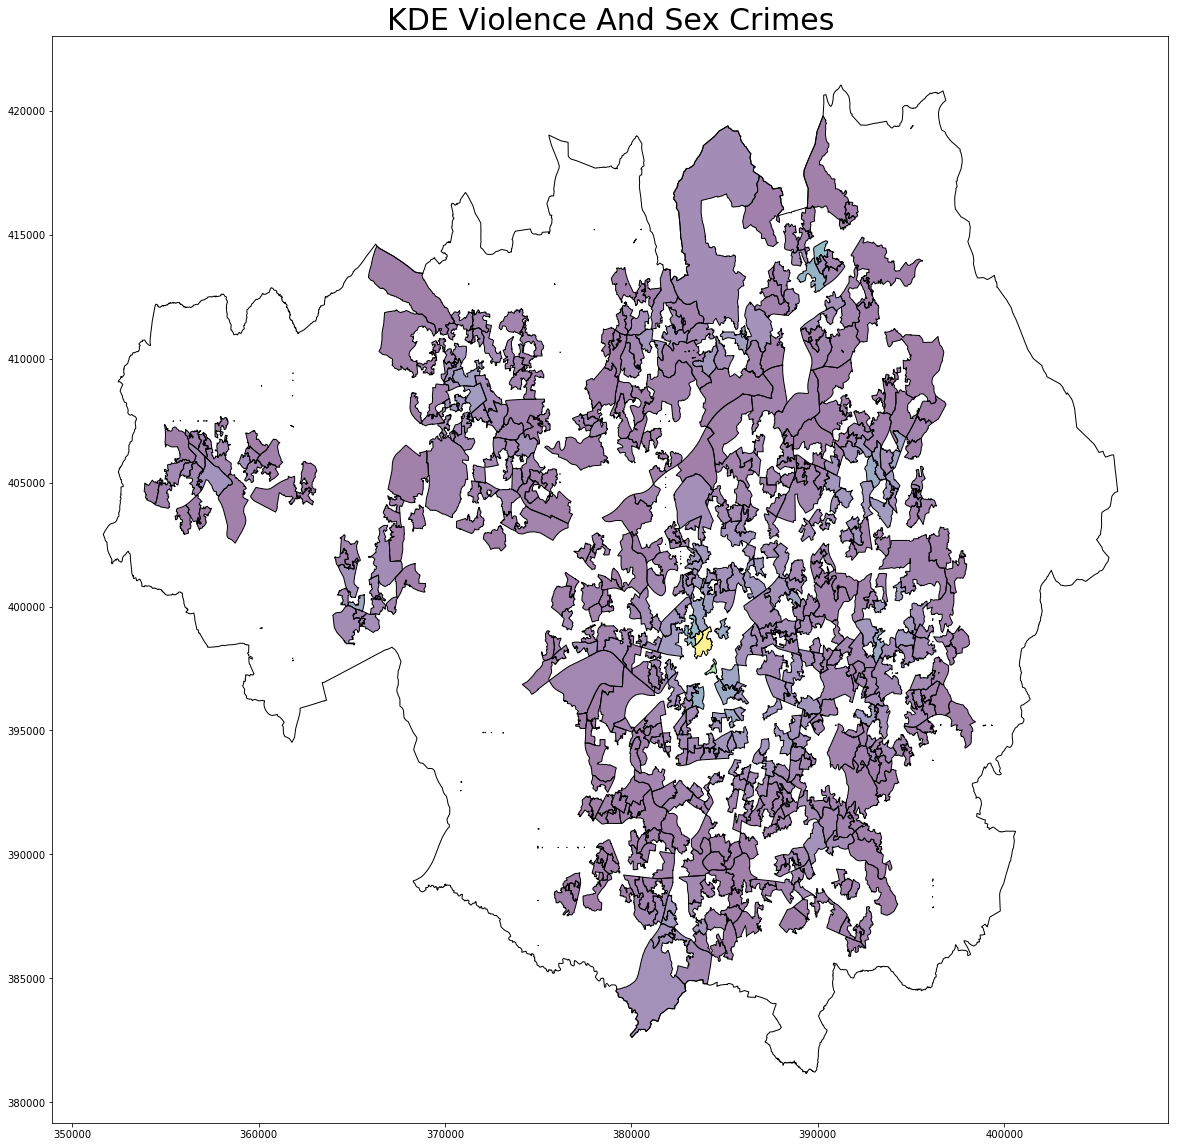

In [93]:
disolved = read_file('data/disolved.shp')

fig, ax = plt.subplots(figsize=(20,20))
ax = VS117_ZMax.plot(column='Z', ax=disolved.plot(ax=ax, color="white"))
plt.title('KDE Violence And Sex Crimes', size = 30)

Exception KeyboardInterrupt()<bound method Polygon.__del__ of <shapely.geometry.polygon.Polygon object at 0x0000000016C885C0>>

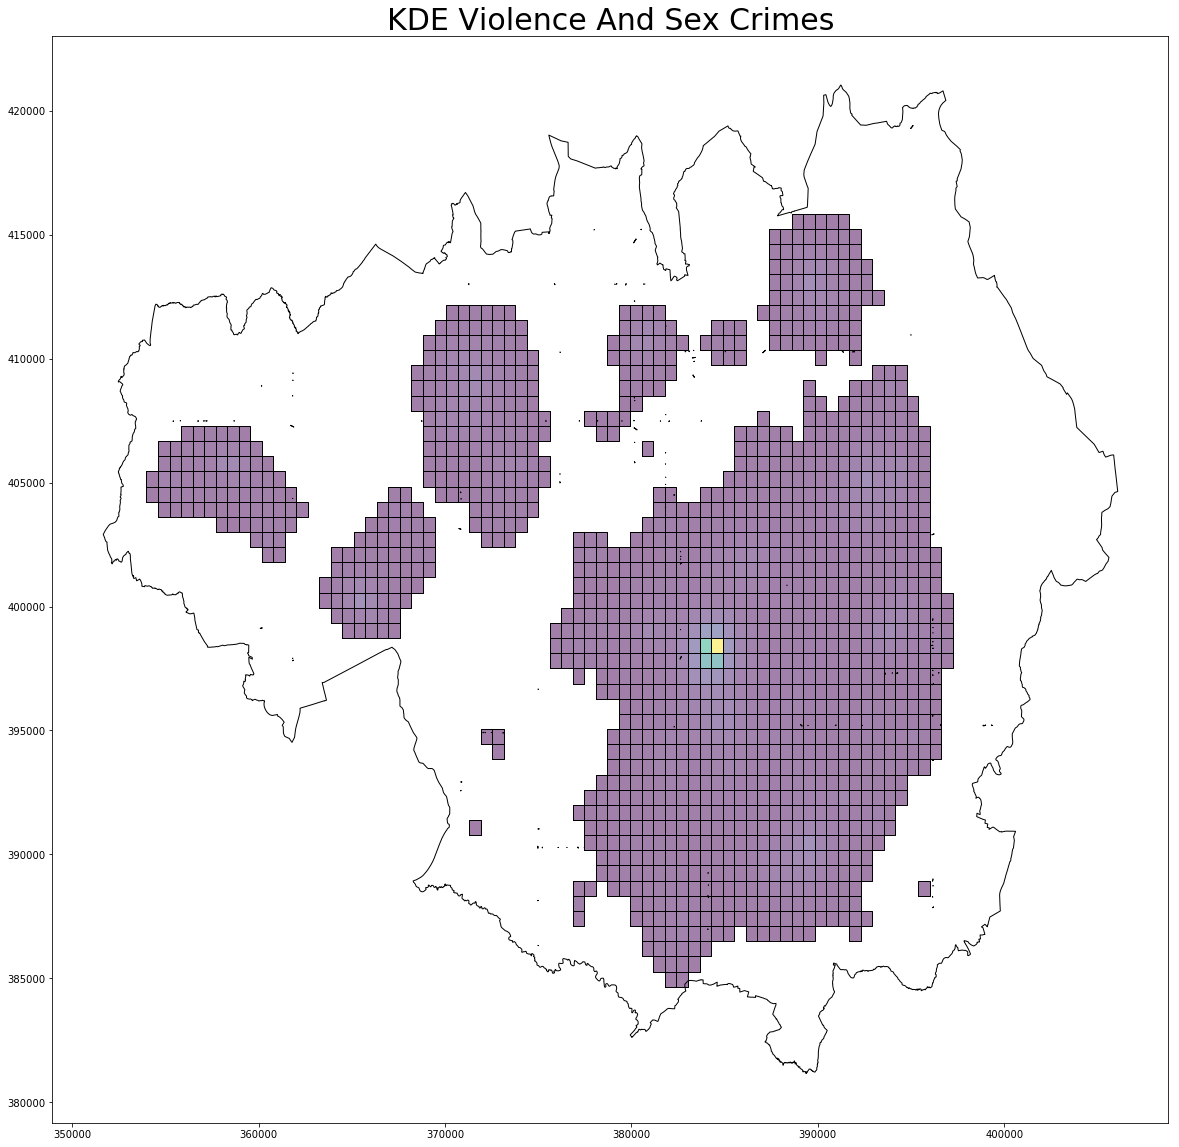

In [81]:
disolved = read_file('data/disolved.shp')
quantile_VS = getTopQuantile(kdeAntisocial117)
fig, ax = plt.subplots(figsize=(20,20))
ax = quantile_VS.plot(column='Z', ax=disolved.plot(ax=ax, color="white"))
plt.title('KDE Violence And Sex Crimes', size = 30)

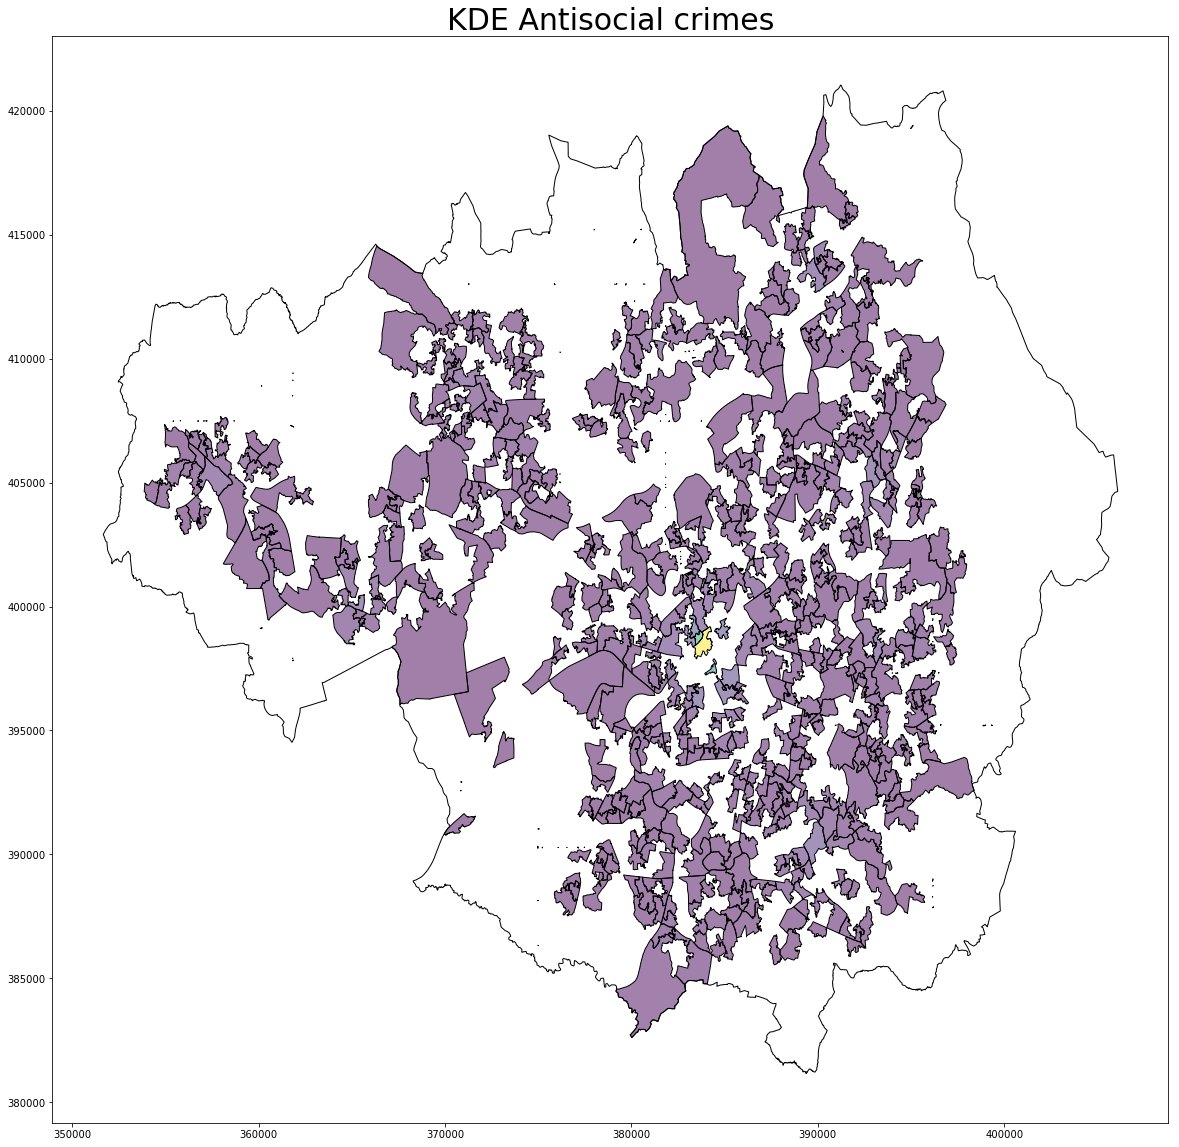

In [94]:
disolved = read_file('data/disolved.shp')
fig, ax = plt.subplots(figsize=(20,20))
ax = AS117_ZMax.plot(column='Z', ax=disolved.plot(ax=ax, color="white"))
plt.title('KDE Antisocial crimes', size = 30)

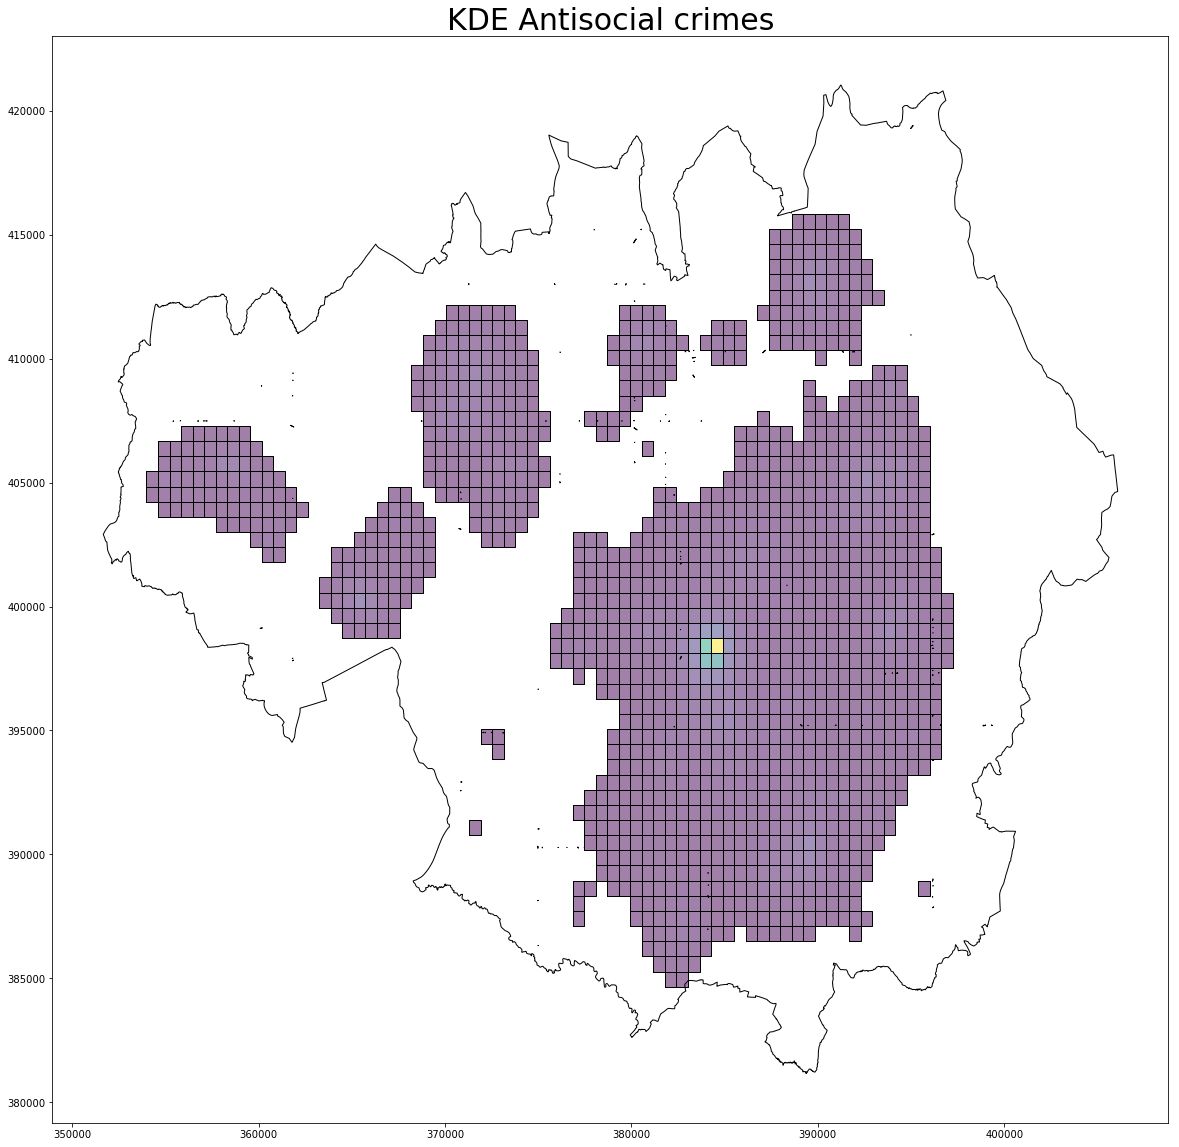

In [85]:
disolved = read_file('data/disolved.shp')
#quantile_AS = getTopQuantile(kdeAntisocial117)
fig, ax = plt.subplots(figsize=(20,20))
ax = quantile_AS.plot(column='Z', ax=disolved.plot(ax=ax, color="white"))
plt.title('KDE Antisocial crimes', size = 30)

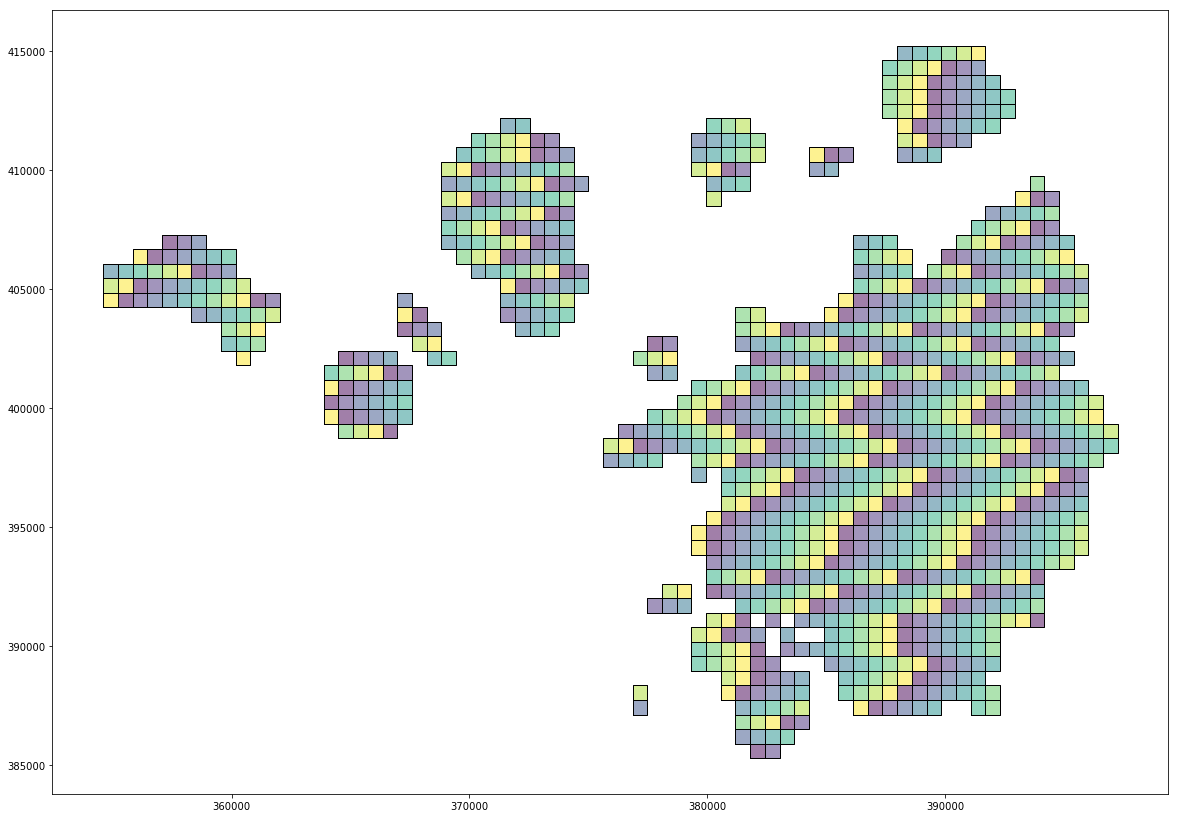

In [20]:
kdeAntisocial117.loc[kdeAntisocial117['Z'] > 2].plot(figsize=(20,20))

In [27]:
zs = kdeAntisocial117['Z']

In [30]:
kdeAntisocial117

,FEATURE,ID_,SOURCE,Z,geometry
0,R1C1,R1C1,Produced by CrimeStat Libraries 1.0; Ned Levin...,0.151326,"POLYGON ((350276.9096 380384.5047577855, 35027..."
1,R1C2,R1C2,None,0.154195,"POLYGON ((350894.9896 380384.5047577855, 35089..."
2,R1C3,R1C3,None,0.159221,"POLYGON ((351513.0696 380384.5047577855, 35151..."
3,R1C4,R1C4,None,0.164413,"POLYGON ((352131.1496 380384.5047577855, 35213..."
4,R1C5,R1C5,None,0.169773,"POLYGON ((352749.2296 380384.5047577855, 35274..."
5,R1C6,R1C6,None,0.175307,"POLYGON ((353367.3096 380384.5047577855, 35336..."
6,R1C7,R1C7,None,0.178836,"POLYGON ((353985.3896 380384.5047577855, 35398..."
7,R1C8,R1C8,None,0.184726,"POLYGON ((354603.4696 380384.5047577855, 35460..."
8,R1C9,R1C9,None,0.190804,"POLYGON ((355221.5496 380384.5047577855, 35522..."
9,R1C10,R1C10,None,0.197072,"POLYGON ((355839.6296 380384.5047577855, 35583..."


In [ ]:

for i, point in kdeAntisocial117.iterrows():
    if point['I']<point['Expt I']:
        #print point
        LMoran1_2017Antisocia = LMoran1_2017Antisocia.drop([i])
        #count = count + 1
print count
len(LMoran1_2017Antisocia)

In [54]:
maxnum = max(kdeAntisocial117['Z'])
print maxnum
index = kdeAntisocial117.loc[kdeAntisocial117['Z']==max(kdeAntisocial117['Z'])].index
print index[0]

62.072581
2854


In [63]:
#for i in range(0, len(kdeAntisocial117)):    
#    count = 0
#    if kdeAntisocial117.loc[i][3] == max(kdeAntisocial117['Z']):
#        print 'fount'+str(i)+':'+str(kdeAntisocial117.loc[i][3])
#        count = count + 1
#        kdeAntisocial117 = kdeAntisocial117.drop([i])
#        print count
    
#qTop5kde = GeoDataFrame()
#qTop5kde['geometry'] = GeoSeries(geo)
#qTop5kde['Z'] = GeoSeries(max_z)
count = 0
zs = []
geo = []
for i in range(0, len(kdeAntisocial117)/5):
    zs.append(max(kdeAntisocial117['Z']))
    index = kdeAntisocial117.loc[kdeAntisocial117['Z']==max(kdeAntisocial117['Z'])].index
    geo.append(kdeAntisocial117['geometry'][index[0]])
    count = count + 1    
    kdeAntisocial117 = kdeAntisocial117.drop([index[0]])
    print count

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [66]:
qTop5kde = GeoDataFrame()
qTop5kde['geometry'] = GeoSeries(geo)
qTop5kde['Z'] = GeoSeries(zs)

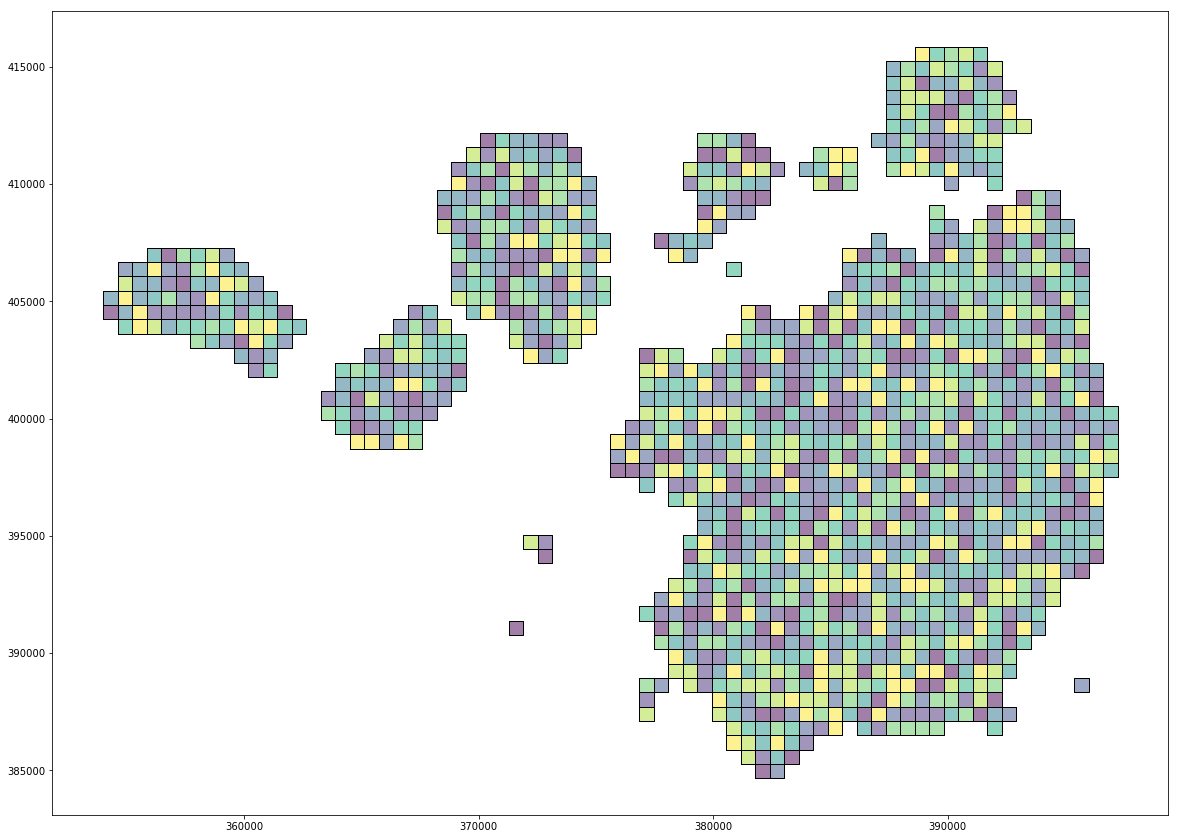

In [69]:
qTop5kde.plot(figsize=(20,20))